In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
sns.set() #setting the default seaborn style for our plots
import pandas as pd
from pandas import DataFrame
df = pd.read_csv('top250-00-19.csv')

In [2]:
df.head(10)

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
5,Rio Ferdinand,Centre-Back,22,West Ham,Premier League,Leeds,Premier League,2000-2001,NaN,26000000
6,Flávio Conceicao,Central Midfield,26,Dep. La Coruña,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,25000000
7,Savo Milosevic,Centre-Forward,26,Real Zaragoza,LaLiga,Parma,Serie A,2000-2001,NaN,25000000
8,David Trézéguet,Centre-Forward,22,Monaco,Ligue 1,Juventus,Serie A,2000-2001,NaN,23240000
9,Claudio López,Centre-Forward,25,Valencia CF,LaLiga,Lazio,Serie A,2000-2001,NaN,23000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4700 non-null   object 
 1   Position      4700 non-null   object 
 2   Age           4700 non-null   int64  
 3   Team_from     4700 non-null   object 
 4   League_from   4700 non-null   object 
 5   Team_to       4700 non-null   object 
 6   League_to     4700 non-null   object 
 7   Season        4700 non-null   object 
 8   Market_value  3440 non-null   float64
 9   Transfer_fee  4700 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 367.3+ KB


In [5]:
league_to = df.groupby(['League_to'])['Transfer_fee'].sum()
top5buy_league = league_to.sort_values(ascending=False).head(5)
top5buy_league = top5buy_league/1000000
top5buy_league.head()
#top leagues in buying players

League_to
Premier League    14695.400
Serie A            7535.220
LaLiga             6680.360
Ligue 1            3682.720
1.Bundesliga       3599.645
Name: Transfer_fee, dtype: float64

C:\Users\ahmmad\AppData\Local\Temp\ipykernel_12792\3866416388.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=[i for i in range(0,16000, 2000)], color='black')
C:\Users\ahmmad\AppData\Local\Temp\ipykernel_12792\3866416388.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=top5buy_league.index, color='black')


[Text(0, 0, 'Premier League'),
 Text(1, 0, 'Serie A'),
 Text(2, 0, 'LaLiga'),
 Text(3, 0, 'Ligue 1'),
 Text(4, 0, '1.Bundesliga')]

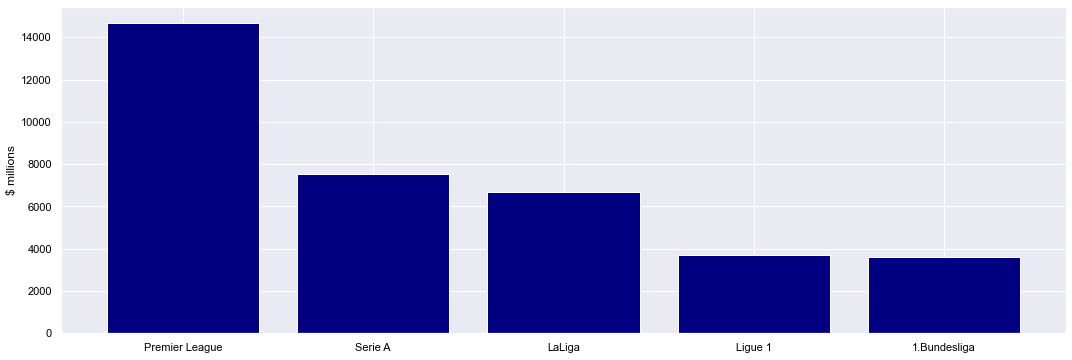

In [6]:
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(top5buy_league.index, top5buy_league.values, color='navy')
ax.set_ylabel("$ millions", color='black')
ax.set_yticklabels(labels=[i for i in range(0,16000, 2000)], color='black')
ax.set_xticklabels(labels=top5buy_league.index, color='black')
#top leagues in buying players

In [8]:
league_from = df.groupby(['League_from'])['Transfer_fee'].sum()
top5sell_league = league_from.sort_values(ascending=False).head(5)
top5sell_league = top5sell_league/1000000
top5sell_league.head()
#top leagues in selling players

League_from
Premier League    7248.51
Serie A           7083.98
LaLiga            5533.86
Ligue 1           4396.89
1.Bundesliga      3062.96
Name: Transfer_fee, dtype: float64

C:\Users\ahmmad\AppData\Local\Temp\ipykernel_12792\1279772471.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=[i for i in range(0,8000, 1000)], color='navy')
C:\Users\ahmmad\AppData\Local\Temp\ipykernel_12792\1279772471.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=top5sell_league.index, color='navy')


[Text(0, 0, 'Premier League'),
 Text(1, 0, 'Serie A'),
 Text(2, 0, 'LaLiga'),
 Text(3, 0, 'Ligue 1'),
 Text(4, 0, '1.Bundesliga')]

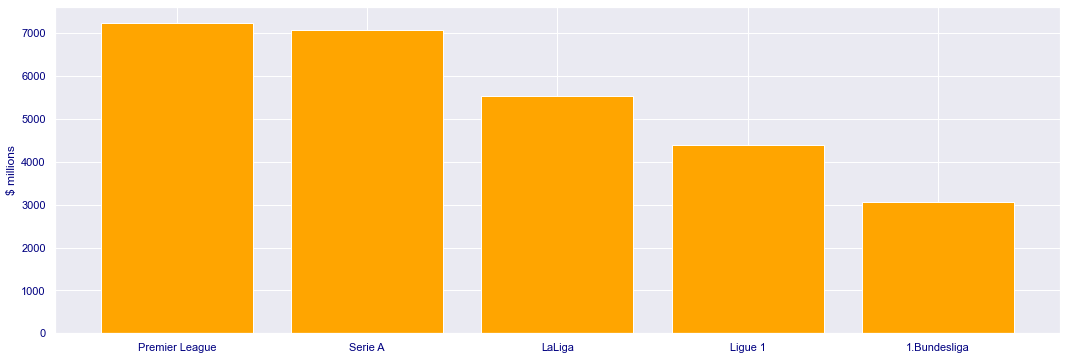

In [9]:
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(top5sell_league.index, top5sell_league.values, color='orange')
ax.set_ylabel("$ millions", color='navy')
ax.set_yticklabels(labels=[i for i in range(0,8000, 1000)], color='navy')
ax.set_xticklabels(labels=top5sell_league.index, color='navy')
#top leagues in selling players

In [10]:
diff_league = top5sell_league - top5buy_league
diff_league = diff_league.sort_values(ascending=False)
diff_league.head()
#leagues profits from selling and buying players

League_from
Ligue 1            714.170
Serie A           -451.240
1.Bundesliga      -536.685
LaLiga           -1146.500
Premier League   -7446.890
Name: Transfer_fee, dtype: float64

Text(0, 0.5, '$ millions')

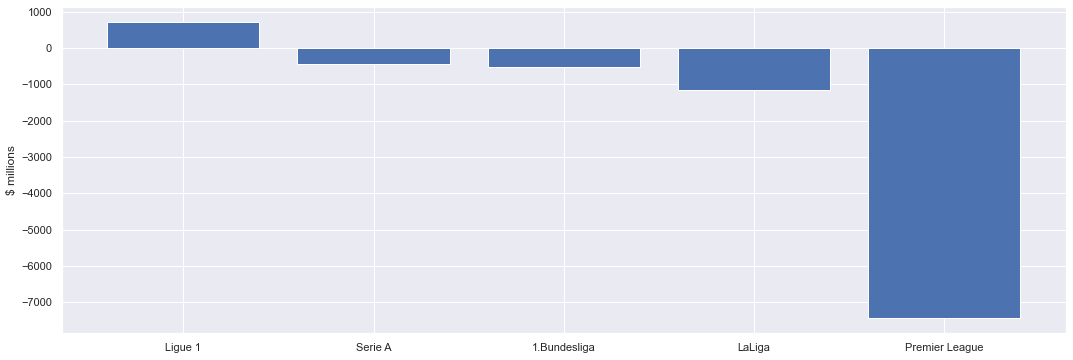

In [11]:
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(diff_league.index, diff_league.values)
ax.set_ylabel("$ millions")
#ligue 1 has the highest profit

In [12]:
league_summary = pd.concat([top5sell_league, top5buy_league], axis=1)
league_summary = league_summary.assign(diff=diff_league)
new_columns = league_summary.columns.values
new_columns[[0, 1]] = ['sell', 'buy']
league_summary.columns = new_columns
league_summary.head()
#summary for selling, buying and profit for leagues

,sell,buy,diff
Premier League,7248.51,14695.400,-7446.890
Serie A,7083.98,7535.220,-451.240
LaLiga,5533.86,6680.360,-1146.500
Ligue 1,4396.89,3682.720,714.170
1.Bundesliga,3062.96,3599.645,-536.685


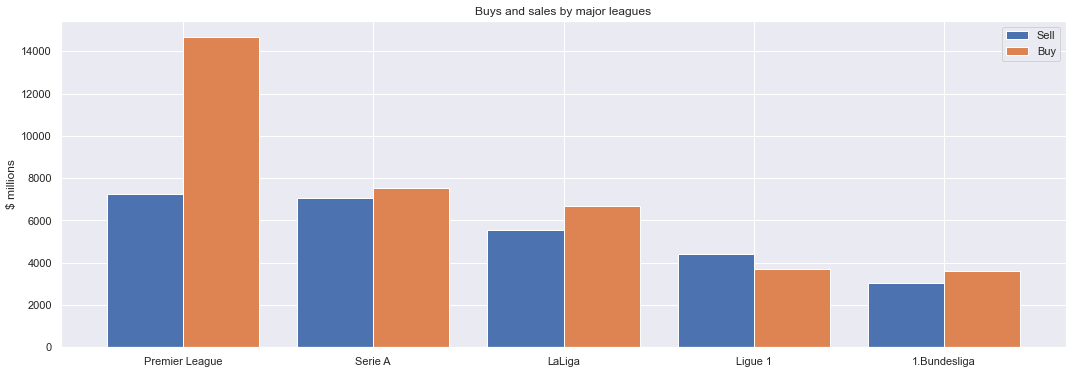

In [13]:
fig, ax = plt.subplots(figsize=(18,6))

sales = league_summary["sell"]
buys = league_summary["buy"]
x = league_summary.index
width=0.4
N = len(x)
loc = np.arange(N)

ax.bar(loc, sales, width, bottom=0, label="Sell")
ax.bar(loc+width, buys, width, bottom=0, label="Buy")

ax.set_title("Buys and sales by major leagues")
ax.legend()
ax.set_xticks(loc + width / 2)
ax.set_xticklabels(x)
ax.set_ylabel("$ millions")
ax.autoscale_view()
#summary for selling and buying for leagues

In [15]:
club_from_sum = df.groupby(['Team_from'])['Transfer_fee'].sum()
club_from_count = df.groupby(['Team_from'])['Transfer_fee'].count()
club_from_mean_price = (club_from_sum/1000000) / club_from_count

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Athletic Bilbao'),
  Text(1, 0, 'RB Leipzig'),
  Text(2, 0, 'Monaco'),
  Text(3, 0, 'FC Augsburg'),
  Text(4, 0, 'FC Barcelona'),
  Text(5, 0, 'SSC Napoli'),
  Text(6, 0, 'Shakhtar D.'),
  Text(7, 0, 'Southampton'),
  Text(8, 0, 'GZ Evergrande'),
  Text(9, 0, 'AS Roma'),
  Text(10, 0, 'Real Madrid'),
  Text(11, 0, 'Bor. Dortmund'),
  Text(12, 0, 'Real Sociedad'),
  Text(13, 0, 'Lazio'),
  Text(14, 0, 'FC Porto'),
  Text(15, 0, 'VfL Wolfsburg'),
  Text(16, 0, 'Sevilla FC'),
  Text(17, 0, 'Valencia CF'),
  Text(18, 0, 'Leicester'),
  Text(19, 0, 'Benfica')])

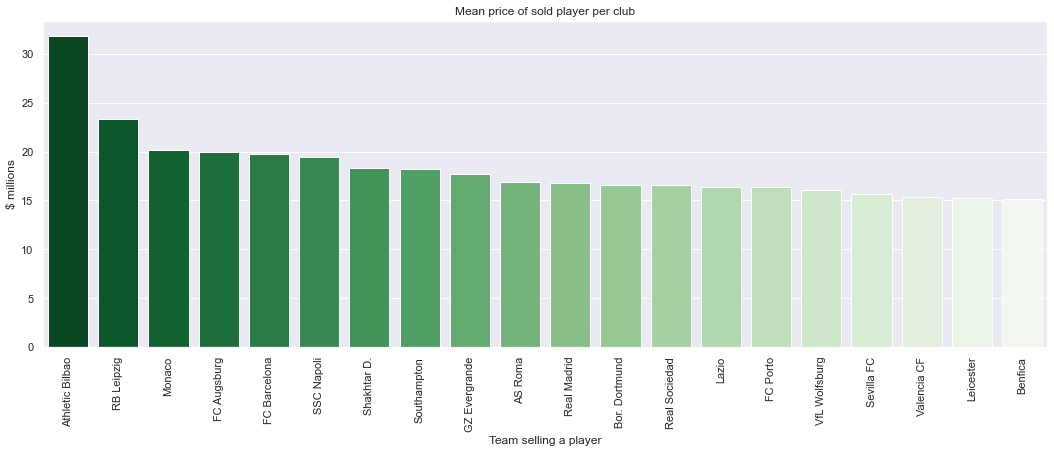

In [16]:
plt.figure(figsize=(18,6))
sellers_mean = club_from_mean_price.sort_values(ascending=False)[:20]
g = sns.barplot(sellers_mean.index, sellers_mean.values, palette="Greens_r")
g.set_title("Mean price of sold player per club")
g.set(ylabel="$ millions", xlabel="Team selling a player")
plt.xticks(rotation=90)
#this shows the mean of sold players per club

In [17]:
club_to_sum = df.groupby(['Team_to'])['Transfer_fee'].sum()
club_to_count = df.groupby(['Team_to'])['Transfer_fee'].count()
club_to_mean_price = (club_to_sum/1000000) / club_to_count

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'SIPG'),
  Text(1, 0, 'FC Barcelona'),
  Text(2, 0, 'CC Yatai'),
  Text(3, 0, 'Man Utd'),
  Text(4, 0, 'Real Madrid'),
  Text(5, 0, 'Paris SG'),
  Text(6, 0, 'Man City'),
  Text(7, 0, 'Chelsea'),
  Text(8, 0, 'Juventus'),
  Text(9, 0, 'Liverpool'),
  Text(10, 0, 'Bayern Munich '),
  Text(11, 0, 'TJ Quanjian'),
  Text(12, 0, 'JS Suning'),
  Text(13, 0, 'Arsenal'),
  Text(14, 0, 'AC Milan'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Atlético Madrid'),
  Text(17, 0, 'BJ Sinobo Guoan'),
  Text(18, 0, 'DL Yifang'),
  Text(19, 0, 'RB Leipzig')])

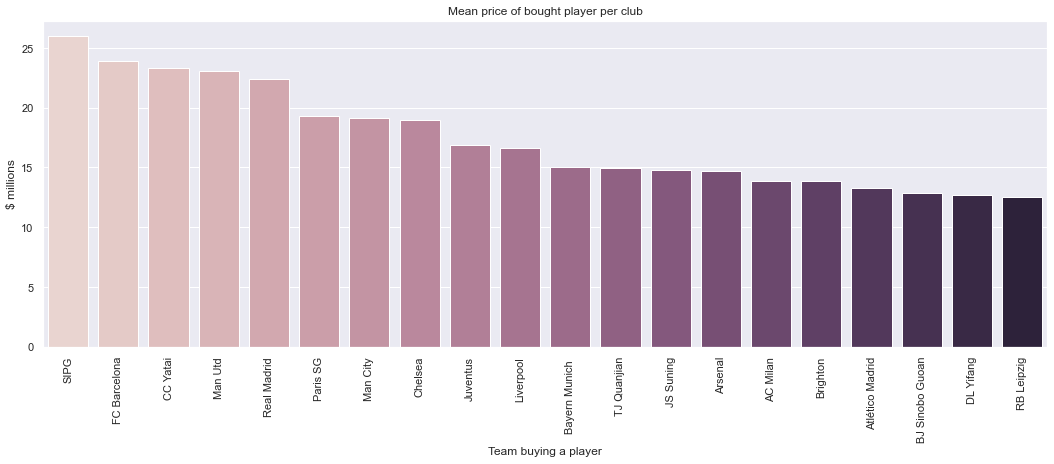

In [18]:
plt.figure(figsize=(18,6))
buy_mean = club_to_mean_price.sort_values(ascending=False)[:20]
g = sns.barplot(buy_mean.index, buy_mean.values, palette=sns.cubehelix_palette(20))
g.set_title("Mean price of bought player per club")
g.set(ylabel="$ millions", xlabel="Team buying a player")
plt.xticks(rotation=90)
#this shows the mean fro bought players per club

In [19]:
diff_club = club_from_sum - club_to_sum
diff_club = diff_club.sort_values(ascending=False)
diff_club = diff_club.dropna()

In [20]:
diff_club = diff_club/1000000
diff_club.head(15)
#profits in millions per club from transfers

FC Porto          556.74
Benfica           451.05
Udinese Calcio    342.50
River Plate       324.63
Parma             263.79
Monaco            262.56
AFC Ajax          245.33
Santos FC         245.00
LOSC Lille        220.44
Sporting CP       209.25
Internacional     205.26
Dinamo Zagreb     201.43
São Paulo         201.31
Cruzeiro          181.00
Boca Juniors      175.60
Name: Transfer_fee, dtype: float64

C:\Users\ahmmad\AppData\Local\Temp\ipykernel_12792\3114476113.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(make_money.index, rotation=90)


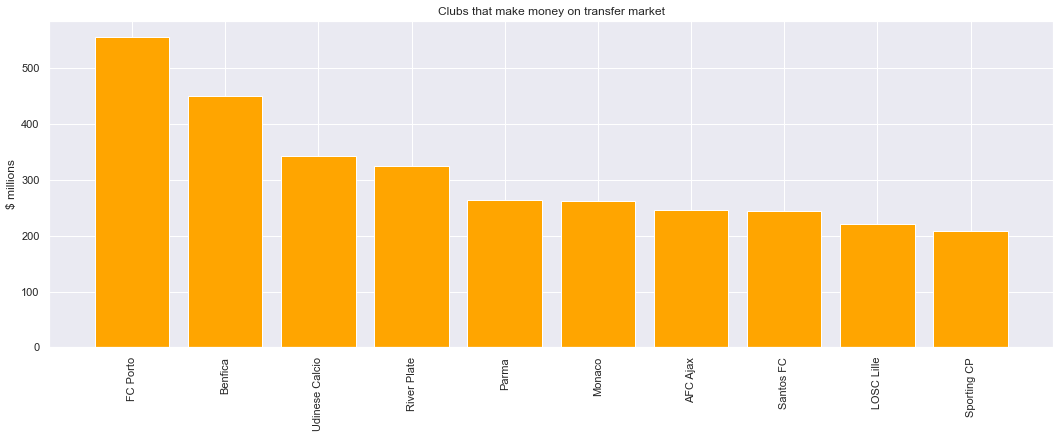

In [22]:
fig, ax = plt.subplots(figsize=(18,6))
make_money = diff_club.sort_values(ascending=False)[:10]
ax.bar(make_money.index, make_money.values, color="orange")
ax.set_title("Clubs that make money on transfer market")
ax.set_ylabel("$ millions")
ax.set_xticklabels(make_money.index, rotation=90)
ax.autoscale_view()

In [23]:
club_from_sum = club_from_sum.sort_values(ascending=False)
club_from_sum = club_from_sum/1000000
club_from_sum.head(15)
#total sum for sales per club

Team_from
Monaco             948.17
FC Porto           917.55
Real Madrid        891.40
Chelsea            839.53
Liverpool          798.41
Juventus           797.98
Benfica            785.75
Inter              785.28
FC Barcelona       752.10
Atlético Madrid    734.40
AS Roma            724.80
Spurs              699.00
Valencia CF        599.65
Bor. Dortmund      580.35
Sevilla FC         564.60
Name: Transfer_fee, dtype: float64

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, '$, millions'), Text(0.5, 0, 'Team selling')]

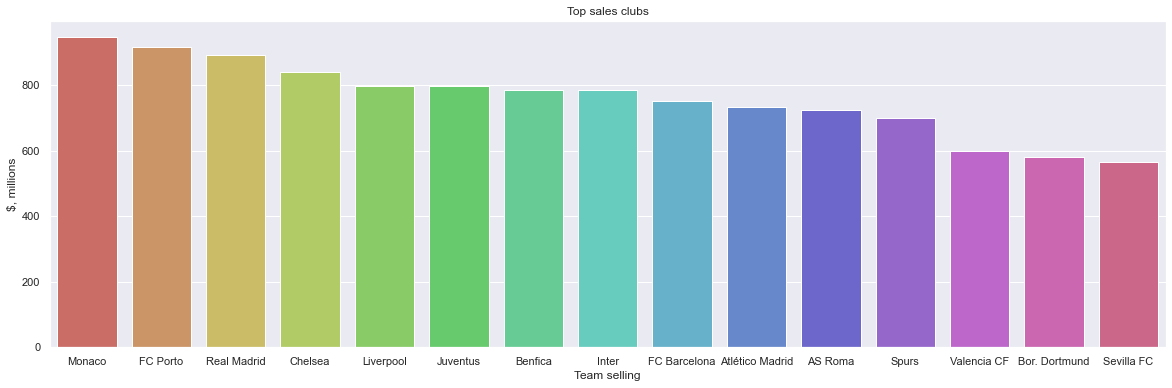

In [24]:
plt.figure(figsize=(20,6))
g = sns.barplot(club_from_sum.head(15).index, club_from_sum.head(15).values, palette=sns.color_palette("hls", 15))
g.set_title("Top sales clubs")
g.set(ylabel="$, millions", xlabel="Team selling")
#top clubs that sale 

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, '$, millions'), Text(0.5, 0, 'Team selling')]

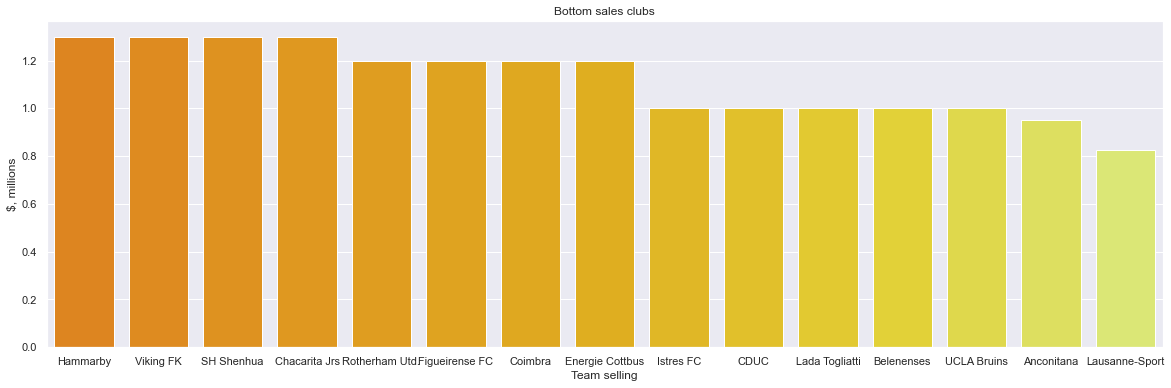

In [25]:
plt.figure(figsize=(20,6))
g = sns.barplot(club_from_sum.tail(15).index, club_from_sum.tail(15).values, palette=sns.color_palette("Wistia_r", 15))
g.set_title("Bottom sales clubs")
g.set(ylabel="$, millions", xlabel="Team selling")
#bottom club that sale

In [26]:
club_from_mean_price = club_from_mean_price.sort_values(ascending=False)
club_from_mean_price.head(15)
#mean price for sales in millions

Team_from
Athletic Bilbao    31.800000
RB Leipzig         23.300000
Monaco             20.173830
FC Augsburg        20.000000
FC Barcelona       19.792105
SSC Napoli         19.480556
Shakhtar D.        18.360000
Southampton        18.215200
GZ Evergrande      17.725000
AS Roma            16.855814
Real Madrid        16.818868
Bor. Dortmund      16.581429
Real Sociedad      16.563636
Lazio              16.419286
FC Porto           16.384821
Name: Transfer_fee, dtype: float64

C:\Users\ahmmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, '$, millions'), Text(0.5, 0, 'Team selling')]

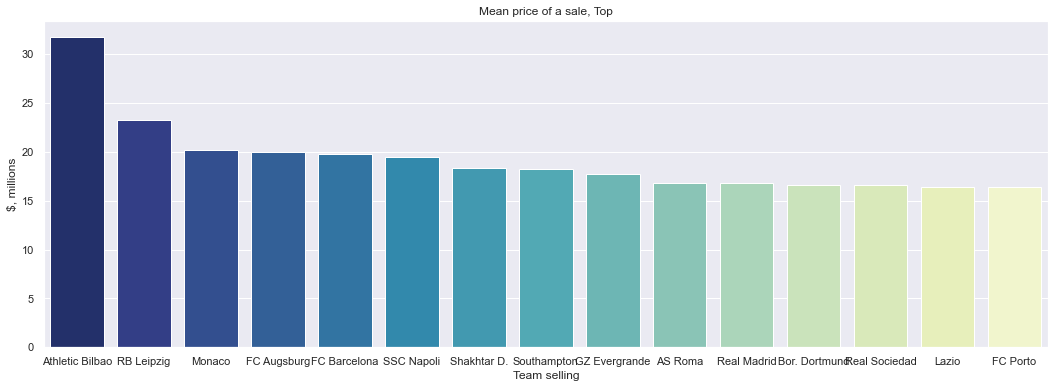

In [27]:
plt.figure(figsize=(18,6))
g = sns.barplot(club_from_mean_price.head(15).index, club_from_mean_price.head(15).values, palette=sns.color_palette("YlGnBu_r", 15))
g.set_title("Mean price of a sale, Top")
g.set(ylabel="$, millions", xlabel="Team selling")